# Question 1
You are working with the used car dataset from the following link: https://www.kaggle.com/datasets/sukhmanibedi/cars4uLinks to an external site.. Your final goal is to use the dataset's features to predict the price of used cars. Your current task is to conduct a COMPLETE exploratory data analysis (EDA) of this dataset. Treat this as a real-world project where no step-by-step instructions are provided. Use a variety of appropriate visualizations and provide meaningful insights for each visualization to communicate your analysis. Conclude with a short summary that highlights your most important findings related to the final prediction task.

Important Note: Think like a data analyst. You are not told what to check. Treat this like a real-world project where you are expected to dig deep and communicate insights clearly. The thoroughness and depth of your analysis will directly impact your grade. A superficial exploration will not receive full credit. 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("used_cars_data.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [68]:
df.shape

(7253, 14)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [70]:
# Feature Engineering 

# 1. Car_Age calculation

current_year = 2024
df['Car_Age'] = current_year - df['Year']

# 2. Brand extraction using the Pandas .str 
df['Brand'] = df['Name'].str.split(' ').str[0]


In [71]:
df.drop(columns=['S.No.', 'Name', 'Year', 'New_Price'], inplace=True)

In [72]:
cols = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
print(f"\nMissing Value Count After Drop:")
print(df[cols].isnull().sum())


Missing Value Count After Drop:
Price                1234
Kilometers_Driven       0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
dtype: int64


In [73]:
df.describe()

,Kilometers_Driven,Seats,Price,Car_Age
count,7.253000e+03,7200.000000,6019.000000,7253.000000
mean,5.869906e+04,5.279722,9.479468,10.634634
std,8.442772e+04,0.811660,11.187917,3.254421
min,1.710000e+02,0.000000,0.440000,5.000000
25%,3.400000e+04,5.000000,3.500000,8.000000
50%,5.341600e+04,5.000000,5.640000,10.000000
75%,7.300000e+04,5.000000,9.950000,13.000000
max,6.500000e+06,10.000000,160.000000,28.000000


Text(0.5, 0, 'Log(1 + Price)')

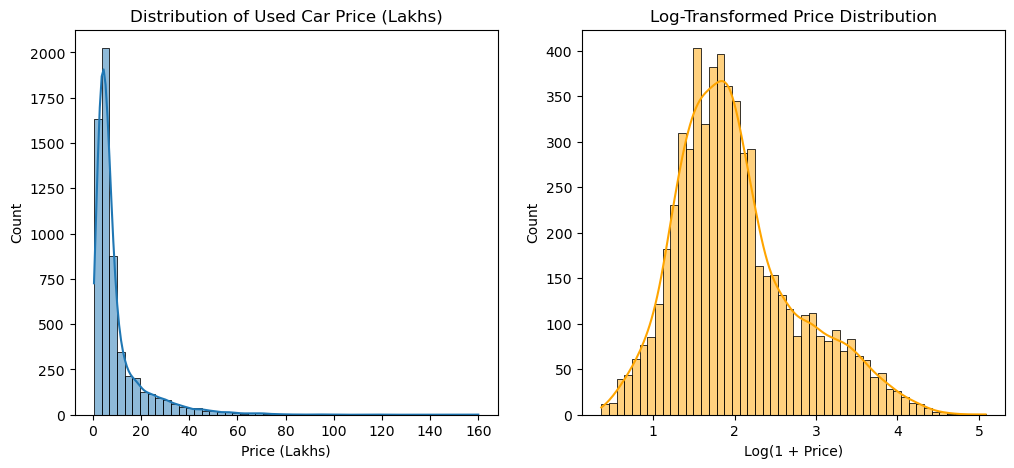

In [74]:
# Univariate Analysis (Target Variable)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, bins=50)
plt.title('Distribution of Used Car Price (Lakhs)')
plt.xlabel('Price (Lakhs)')

# Log transformation for better visualization of skewed data

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Price']), kde=True, bins=50, color='orange')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(1 + Price)')

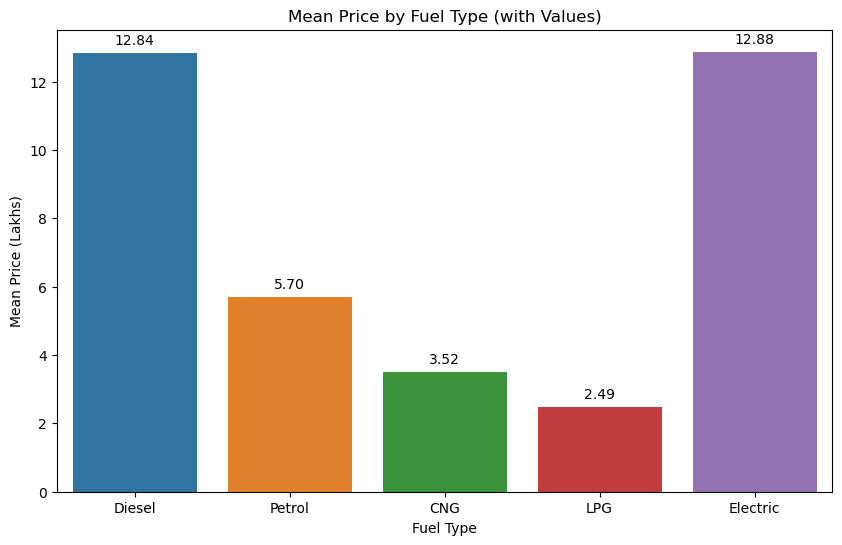

In [75]:
# Price Distribution by Fuel Type

fuel_order = ['Diesel', 'Petrol', 'CNG', 'LPG', 'Electric']
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Fuel_Type', 
    y='Price', 
    data=df, 
    order=fuel_order, 
    errorbar=None
)

plt.title('Mean Price by Fuel Type (with Values)')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Price (Lakhs)')

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 9), 
        textcoords = 'offset points'
    )

Text(0, 0.5, 'Price (Lakhs)')

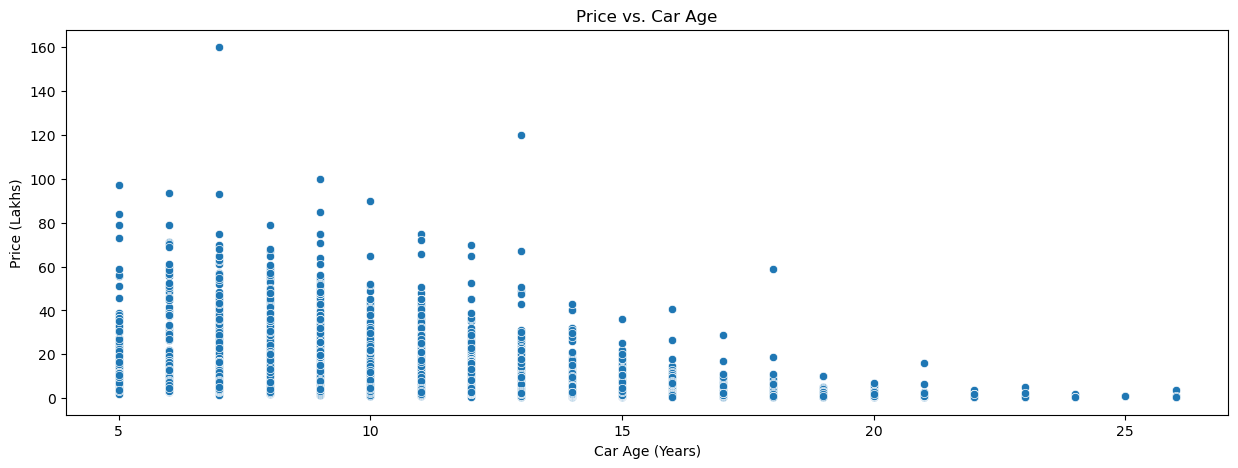

In [76]:
# Bivariate Analysis (Categorical Features vs. Price) 

# A. Car Age vs. Price

plt.figure(figsize=(15, 5))
sns.scatterplot(x='Car_Age', y='Price', data=df)
plt.title('Price vs. Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price (Lakhs)')

Text(0, 0.5, 'Price (Lakhs)')

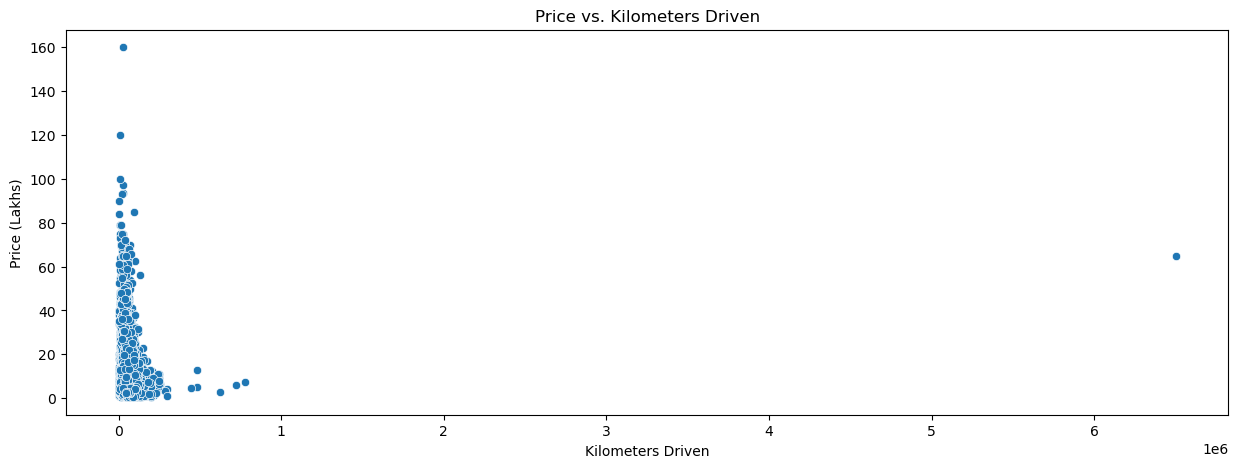

In [77]:
# B. Kilometers_Driven vs. Price

plt.figure(figsize=(15, 5))
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df)
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (Lakhs)')

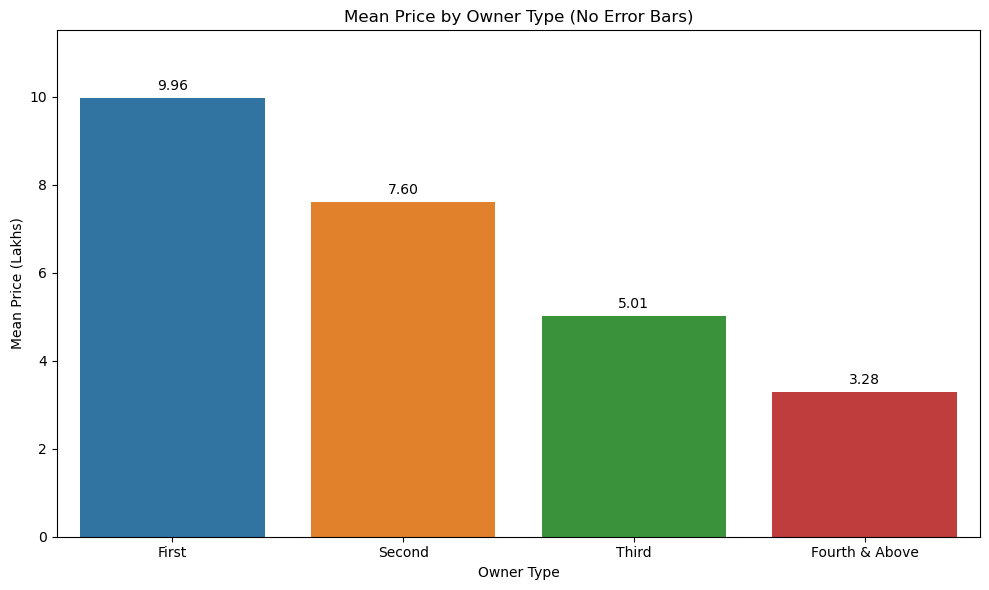

In [78]:
# C. Price vs. Owner_Type

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Owner_Type', 
    y='Price', 
    data=df, 
    order=['First', 'Second', 'Third', 'Fourth & Above'], 
    errorbar=None
)
plt.title('Mean Price by Owner Type (No Error Bars)')
plt.xlabel('Owner Type')
plt.ylabel('Mean Price (Lakhs)')
plt.ylim(0, ax.get_ylim()[1] * 1.1) 
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 9), 
        textcoords = 'offset points'
    )

Text(0, 0.5, 'Price (Lakhs)')

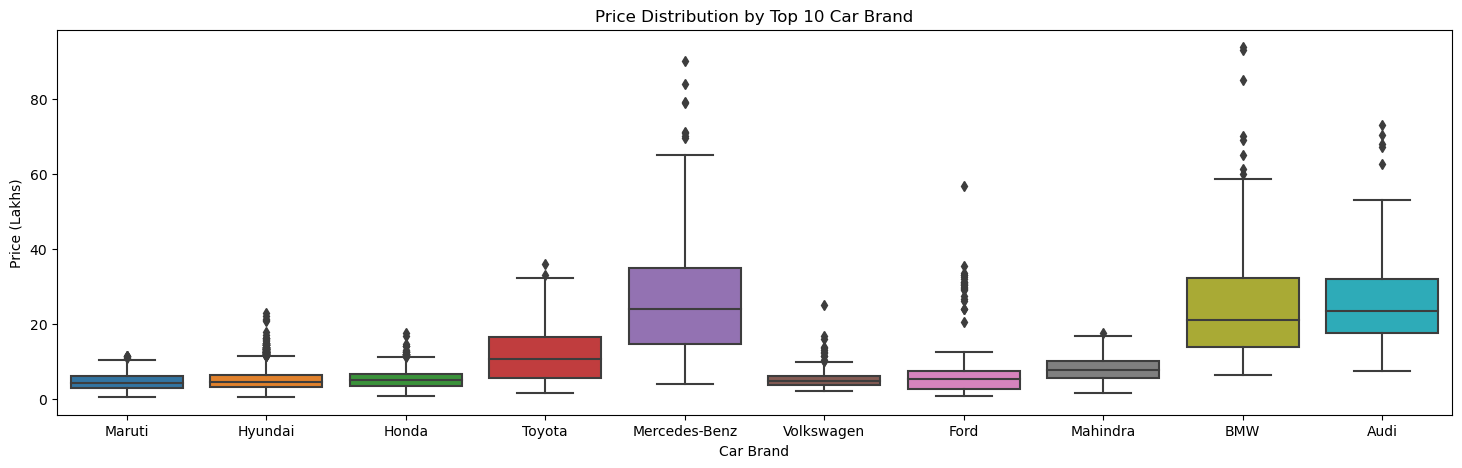

In [79]:
# D. Categorical Features vs. Price (Top 10 Brands)

top_brands = df['Brand'].value_counts().nlargest(10).index
plt.figure(figsize=(18, 5))
sns.boxplot(x='Brand', y='Price', data=df[df['Brand'].isin(top_brands)], order=top_brands)
plt.title('Price Distribution by Top 10 Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price (Lakhs)')


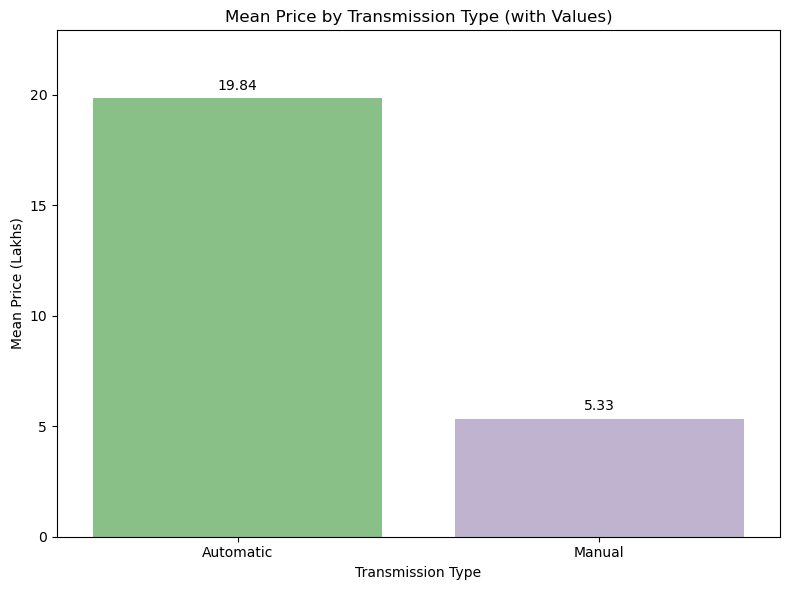

In [80]:
# E. Create the Bar Plot (Mean Price vs. Transmission Type)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='Transmission', 
    y='Price', 
    data=df, 
    order=['Automatic', 'Manual'],
    palette='Accent',
    errorbar=None
)

plt.title('Mean Price by Transmission Type (with Values)')
plt.xlabel('Transmission Type')
plt.ylabel('Mean Price (Lakhs)')
plt.ylim(0, ax.get_ylim()[1] * 1.1) 
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 9), 
        textcoords = 'offset points'
    )

Text(0, 0.5, 'Price (Lakhs)')

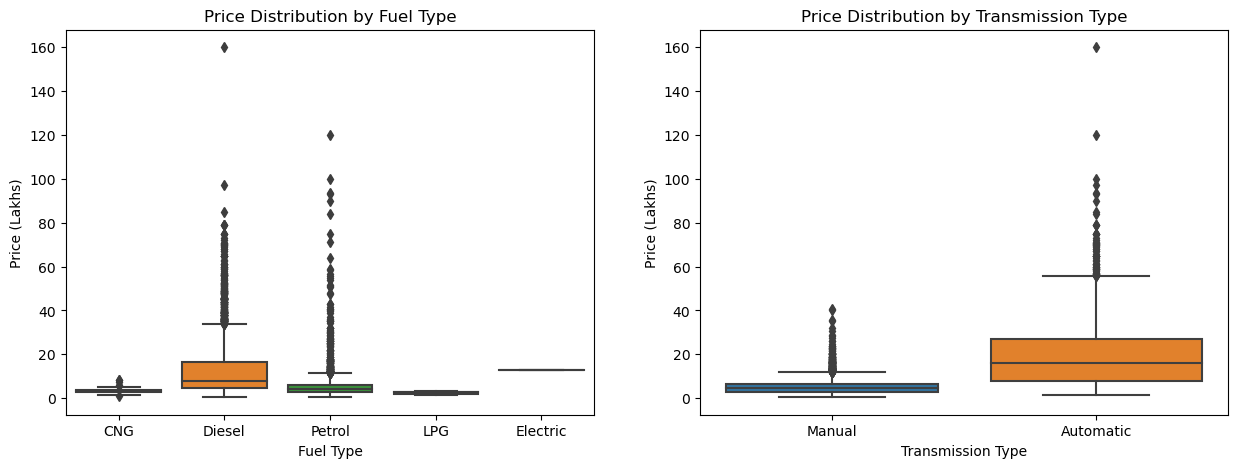

In [81]:
#  F. Fuel Type and Transmission vs. Price

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (Lakhs)')


plt.subplot(1, 2, 2)
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (Lakhs)')

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Predictors')

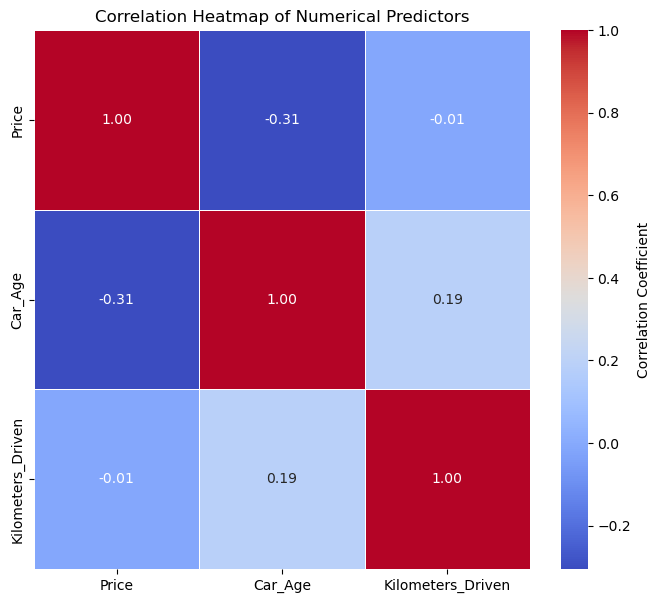

In [82]:
numerical_cols = ['Price', 'Car_Age', 'Kilometers_Driven']
df_corr = df[numerical_cols]

corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 7))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation Heatmap of Numerical Predictors')

# Summary:

1. The Price distribution is heavily right-skewed (as seen in the raw histogram).Log-transformation of Price is used for better visualization of skewed data.
2. Brand is a highly effective categorical feature, clearly separating luxury brands (e.g., BMW, Audi) from economy brands (e.g., Maruti, Hyundai).
3. Transmission (Automatic vs. Manual) also shows a significant difference in price distribution, making it an important categorical factor.
4. An extreme outlier exists in the (Kilometers Driven) column and must be removed or capped before model training to prevent inaccurate predictions.
5. Diesel cars show a noticeably higher median and mean price distribution compared to Petrol cars, making this a valuable predictor.
6. Automatic cars (approx. 20 Lakhs average) are significantly more expensive than Manual cars (approx. 5.5  Lakhs average).
   

# Question 2

You are working with population dataset (population.csv) from the following link: https://github.com/datasets/population/blob/main/data/population.csvLinks to an external site.. Your task is to use Plotly to create one visualization that represents the entire dataset clearly and completely. Your grade will depend on how effectively your visualization communicates the full information contained in the data.

In [83]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('population.csv')

df.rename(columns={
    'Country Name': 'Country',
    'Country Code': 'Code',
    'Year': 'Year',
    'Value': 'Population'
}, inplace=True)

fig = px.choropleth(
    df,
    locations="Code",  
    color="Population",
    hover_name="Country",
    animation_frame="Year",
    color_continuous_scale="Plasma", 
    title="Global Population Trends Over Time"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()
